In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas DataFrames
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)      # Adjust display width

# Define the URL for the PIMA Diabetes Dataset
# This dataset is commonly used and available from UCI ML Repository
data_url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(data_url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure you have an active internet connection or try downloading the CSV manually.")
    print("Manual download link: https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data")
    print("If downloaded manually, save it as 'diabetes.csv' in the same directory as this notebook.")

# Display the first 5 rows of the DataFrame to get an initial look
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics of the DataFrame
print("\nDescriptive Statistics:")
print(df.describe())

Dataset loaded successfully!

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 

In [2]:
# --- Step 2: Handle Missing Values & Outliers ---

print("\nChecking for zero values in relevant columns (which might indicate missing data):")
# Columns where zero values are physiologically impossible or highly unlikely.
# These are the input features used to predict the 'Outcome' (Diabetes).
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_check:
    # Count the number of zero values in each specified column
    zero_count = (df[col] == 0).sum()
    print(f"Column '{col}': {zero_count} zeros")

# Replace zero values with NaN for easier handling.
# This makes it clear that these are missing data points, not actual zero measurements.
print("\nReplacing zero values with NaN for imputation:")
df[cols_to_check] = df[cols_to_check].replace(0, np.nan)

# Verify that zeros have been replaced by NaNs.
# This shows how many actual missing values (NaNs) are now present in each column.
print("\nChecking for NaN values after replacement:")
print(df.isnull().sum())

# For now, let's impute missing values with the median of their respective columns.
# Median is often preferred over mean for skewed data or when outliers are present,
# as it is less sensitive to extreme values. This ensures our model has complete data.
print("\nImputing missing values with the median of each column:")
for col in cols_to_check:
    median_val = df[col].median()
    # MODIFICATION START: Addressing the FutureWarning for inplace=True
    # Instead of df[col].fillna(median_val, inplace=True), we assign the result back
    df[col] = df[col].fillna(median_val)
    # MODIFICATION END
    print(f"Filled missing values in '{col}' with median: {median_val}")

# Verify that there are no more NaN values after imputation.
print("\nChecking for NaN values after imputation:")
print(df.isnull().sum())

# Display descriptive statistics after handling missing values to see the impact.
# This helps us understand the new distribution of our features.
print("\nDescriptive Statistics after handling missing values:")
print(df.describe())



Checking for zero values in relevant columns (which might indicate missing data):
Column 'Glucose': 5 zeros
Column 'BloodPressure': 35 zeros
Column 'SkinThickness': 227 zeros
Column 'Insulin': 374 zeros
Column 'BMI': 11 zeros

Replacing zero values with NaN for imputation:

Checking for NaN values after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Imputing missing values with the median of each column:
Filled missing values in 'Glucose' with median: 117.0
Filled missing values in 'BloodPressure' with median: 72.0
Filled missing values in 'SkinThickness' with median: 29.0
Filled missing values in 'Insulin' with median: 125.0
Filled missing values in 'BMI' with median: 32.3

Checking for NaN values after imputation:
Pregn

--- Starting Exploratory Data Analysis (EDA) ---

1. Distribution of the Target Variable ('Outcome'):
Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


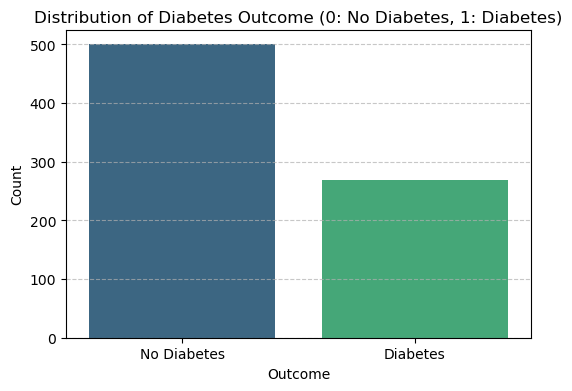


2. Visualizing Distributions of Individual Features:


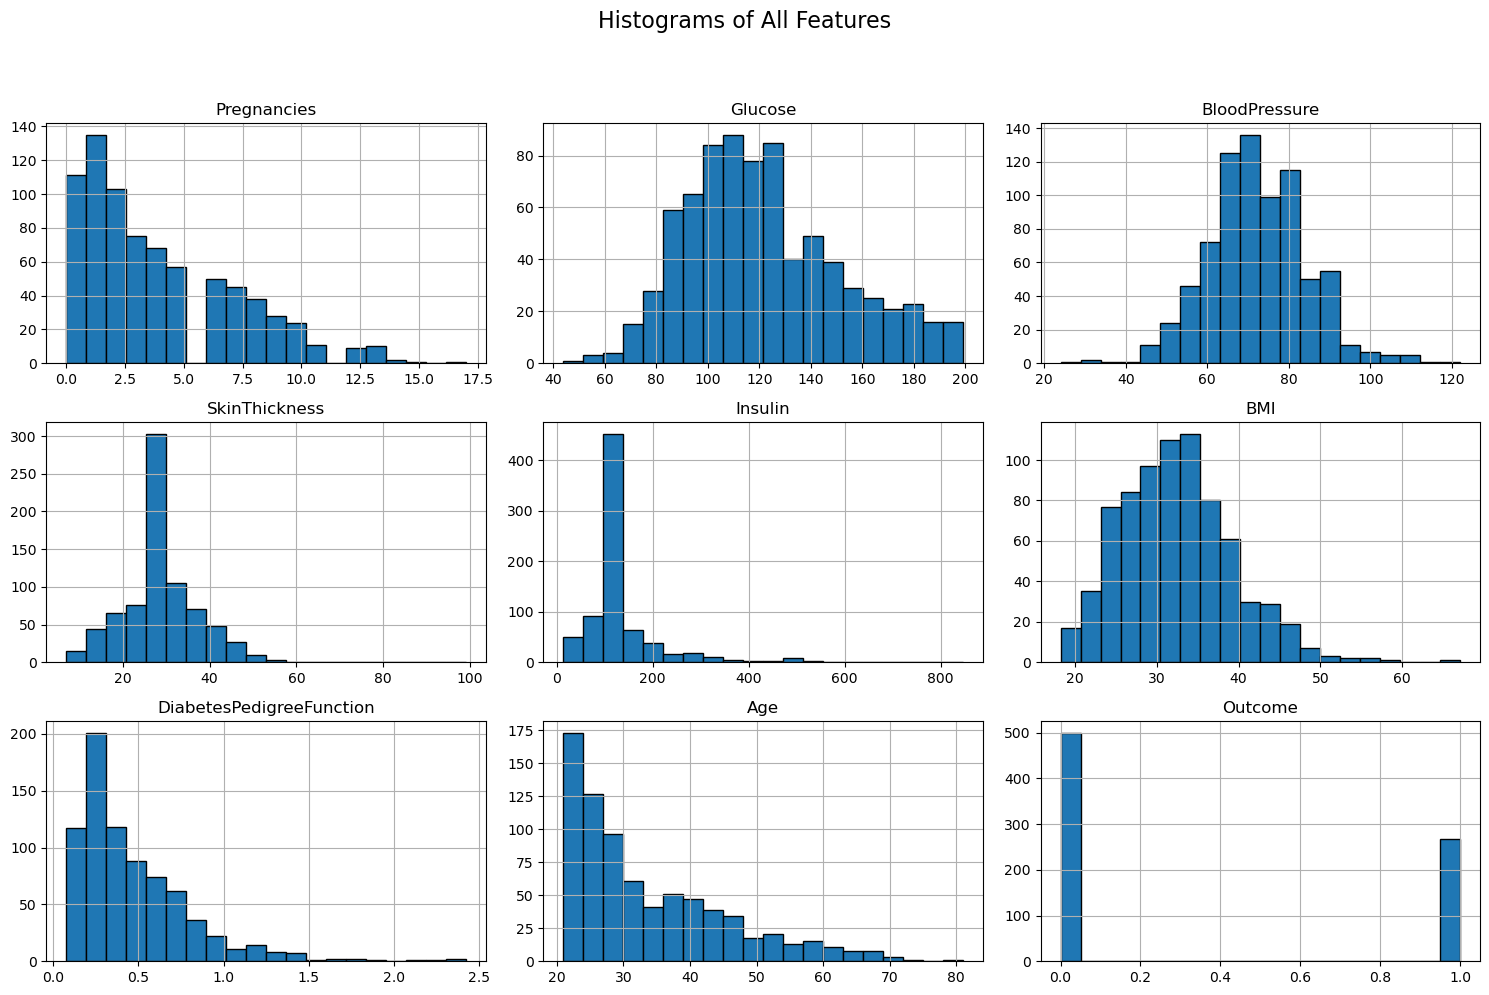

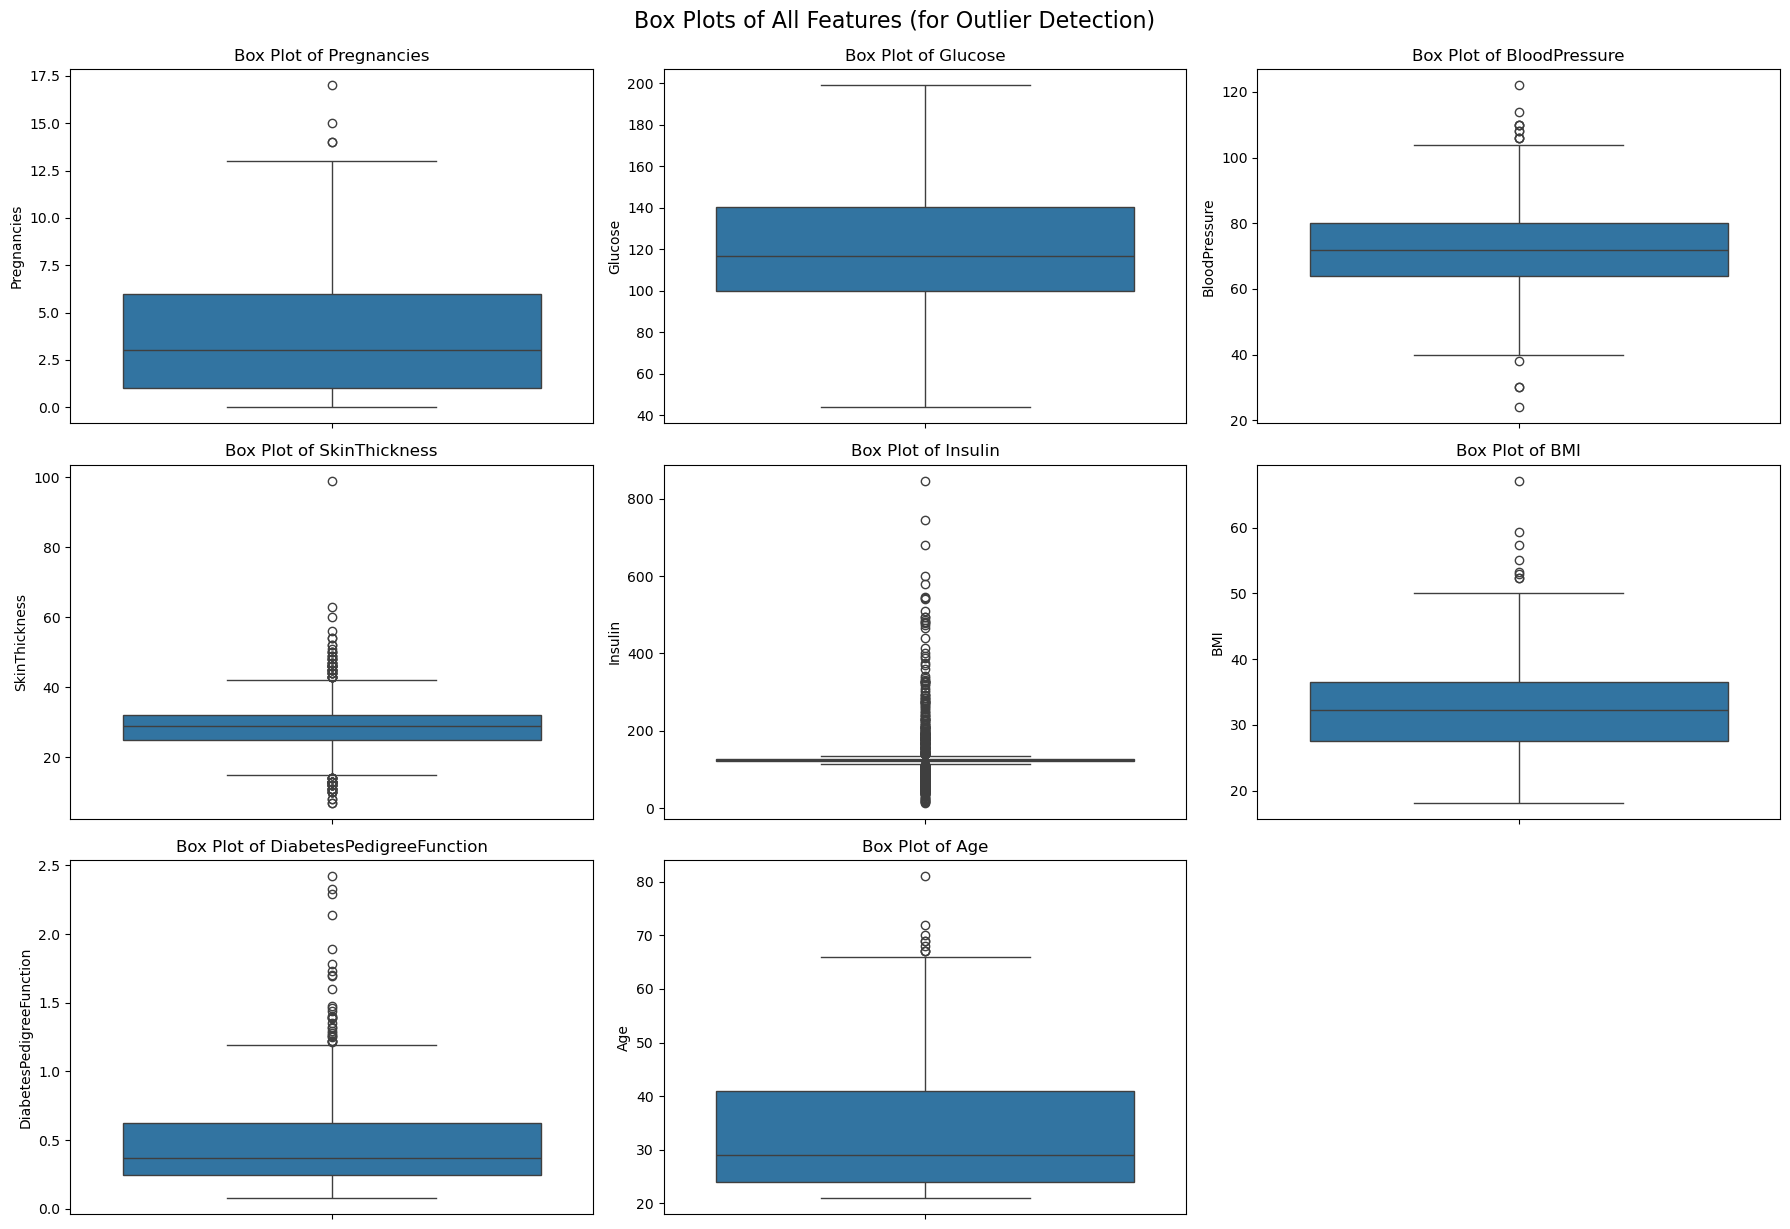


3. Generating Correlation Matrix:


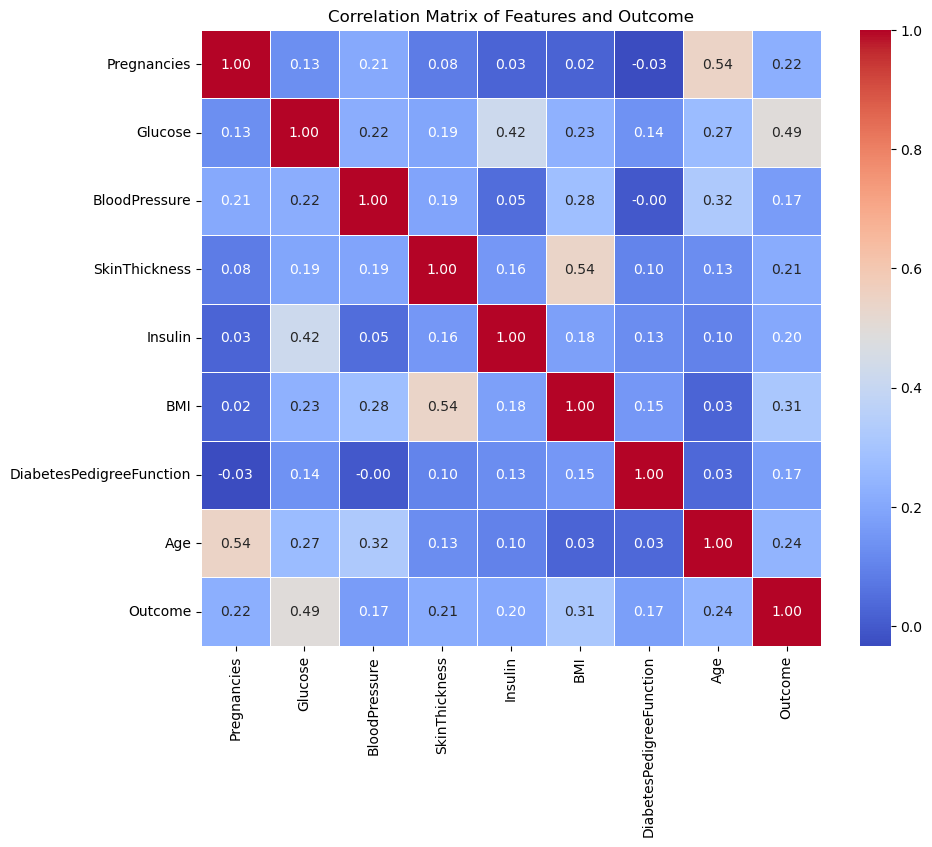


--- EDA Complete ---


In [3]:
# --- Step 3: Exploratory Data Analysis (EDA) ---

print("--- Starting Exploratory Data Analysis (EDA) ---")

# 1. Distribution of the Target Variable ('Outcome')
print("\n1. Distribution of the Target Variable ('Outcome'):")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
# Updated sns.countplot to address FutureWarning
sns.countplot(x='Outcome', data=df, palette='viridis', hue='Outcome', legend=False)
plt.title('Distribution of Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Distributions of Individual Features (Histograms and Box Plots)
print("\n2. Visualizing Distributions of Individual Features:")

# List of all feature columns (excluding 'Outcome')
feature_columns = df.columns.drop('Outcome')

# Create histograms for all features
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

# Create box plots for all features to identify outliers
plt.figure(figsize=(18, 12))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of features (e.g., 3 rows, 3 columns)
    # Removed 'palette' argument from sns.boxplot to address FutureWarning
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of All Features (for Outlier Detection)', y=1.02, fontsize=16)
plt.show()


# 3. Correlation Matrix
print("\n3. Generating Correlation Matrix:")
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Outcome')
plt.show()

print("\n--- EDA Complete ---")


In [4]:
# --- Phase 3: Machine Learning Model Development & Training ---

print("--- Starting Data Splitting ---")

# 1. Separate Features (X) and Target (y)
# X will contain all columns except 'Outcome'
X = df.drop('Outcome', axis=1)
# y will contain only the 'Outcome' column
y = df['Outcome']

print(f"\nShape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

# Display first few rows of X and y to confirm
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nFirst 5 rows of Target (y):")
print(y.head())

# 2. Split Data into Training and Testing Sets
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
# random_state ensures reproducibility of the split
# stratify=y ensures that the proportion of target variable (diabetes/no diabetes)
# is the same in both training and testing sets, which is important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\n--- Data Splitting Complete ---")


--- Starting Data Splitting ---

Shape of Features (X): (768, 8)
Shape of Target (y): (768,)

First 5 rows of Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0           35.0    125.0  33.6                     0.627   50
1            1     85.0           66.0           29.0    125.0  26.6                     0.351   31
2            8    183.0           64.0           29.0    125.0  23.3                     0.672   32
3            1     89.0           66.0           23.0     94.0  28.1                     0.167   21
4            0    137.0           40.0           35.0    168.0  43.1                     2.288   33

First 5 rows of Target (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)

--- Data Splitting Complete ---


In [5]:
# --- Phase 3: Machine Learning Model Development & Training (Continued) ---

print("--- Starting Model Selection and Training ---")

# Import necessary classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the models
# For Logistic Regression, max_iter is set to ensure convergence
# random_state is set for reproducibility for tree-based models
log_reg_model = LogisticRegression(max_iter=200, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

print("\nModels Initialized:")
print(f"- Logistic Regression: {log_reg_model}")
print(f"- Random Forest Classifier: {rf_model}")
print(f"- Decision Tree Classifier: {dt_model}")

# Train each model on the training data
print("\nTraining Models...")

# Train Logistic Regression
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Model Trained.")

# Train Random Forest Classifier
rf_model.fit(X_train, y_train)
print("Random Forest Classifier Model Trained.")

# Train Decision Tree Classifier
dt_model.fit(X_train, y_train)
print("Decision Tree Classifier Model Trained.")

print("\n--- Model Training Complete ---")

# We will evaluate these models in the next step.


--- Starting Model Selection and Training ---

Models Initialized:
- Logistic Regression: LogisticRegression(max_iter=200, random_state=42)
- Random Forest Classifier: RandomForestClassifier(random_state=42)
- Decision Tree Classifier: DecisionTreeClassifier(random_state=42)

Training Models...
Logistic Regression Model Trained.
Random Forest Classifier Model Trained.
Decision Tree Classifier Model Trained.

--- Model Training Complete ---


--- Starting Model Evaluation ---

Evaluating Logistic Regression...
  Accuracy: 0.7013
  Precision: 0.5870
  Recall: 0.5000
  F1-Score: 0.5400


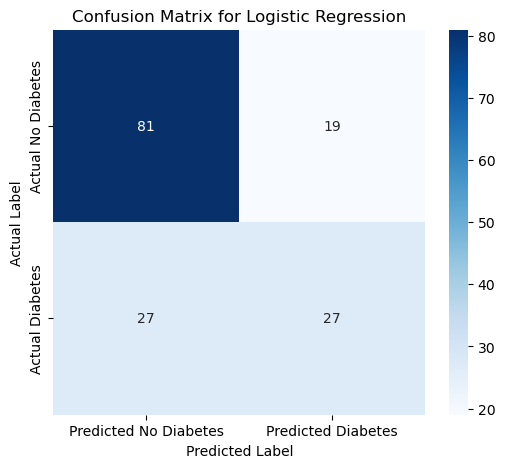

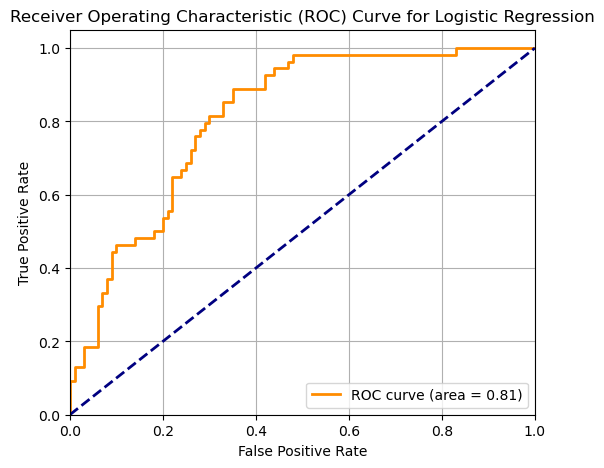


Evaluating Random Forest...
  Accuracy: 0.7792
  Precision: 0.7273
  Recall: 0.5926
  F1-Score: 0.6531


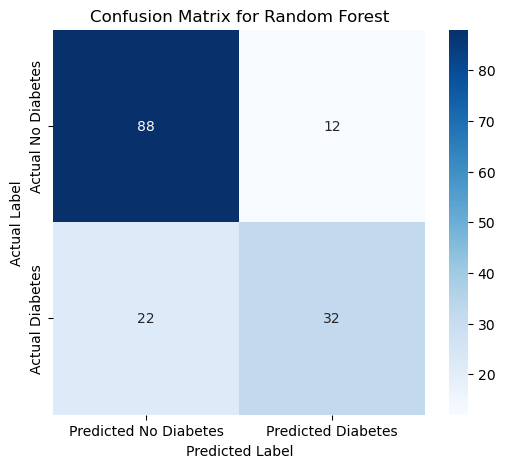

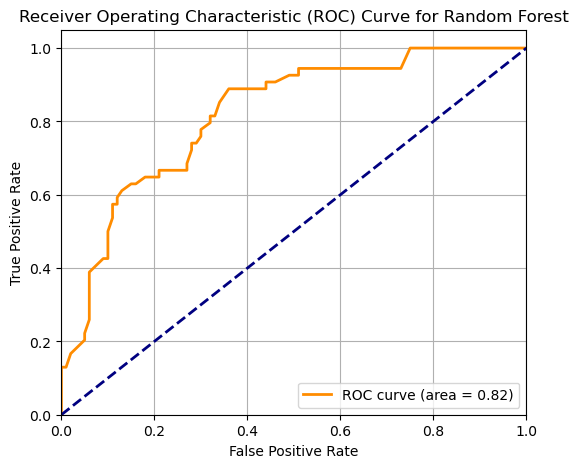


  Feature Importances for Random Forest:
Glucose                     0.274086
BMI                         0.161903
DiabetesPedigreeFunction    0.125020
Age                         0.112985
Insulin                     0.091224
BloodPressure               0.083518
Pregnancies                 0.080795
SkinThickness               0.070468
dtype: float64


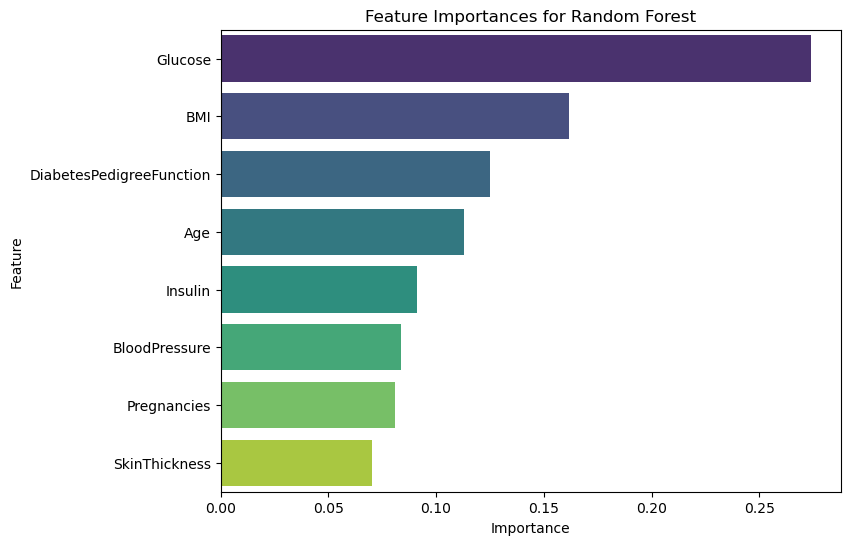


Evaluating Decision Tree...
  Accuracy: 0.6818
  Precision: 0.5532
  Recall: 0.4815
  F1-Score: 0.5149


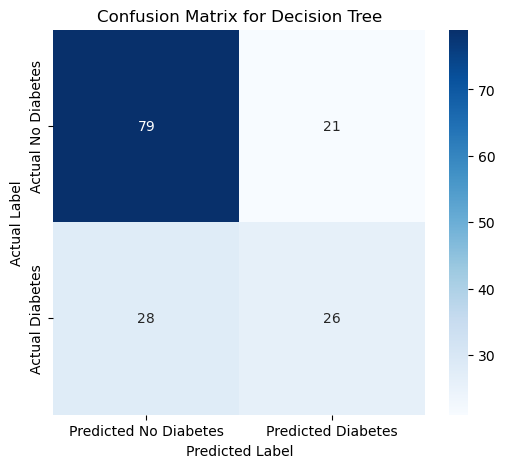

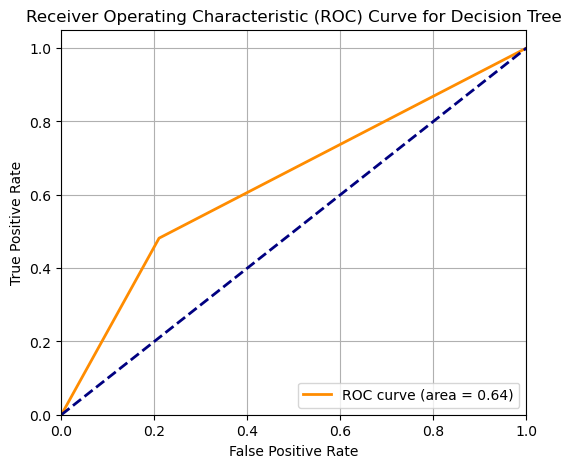


  Feature Importances for Decision Tree:
Glucose                     0.355518
BMI                         0.178572
Age                         0.127095
BloodPressure               0.097661
DiabetesPedigreeFunction    0.092002
Insulin                     0.069723
Pregnancies                 0.064105
SkinThickness               0.015325
dtype: float64


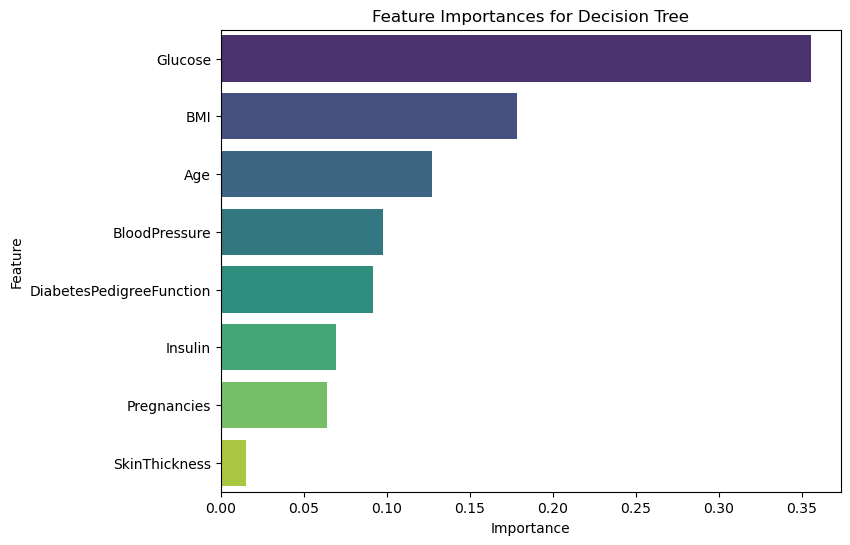


--- Model Evaluation Complete ---

--- Summary of Model Performance ---

Logistic Regression:
  Accuracy: 0.7013
  Precision: 0.5870
  Recall: 0.5000
  F1-Score: 0.5400

Random Forest:
  Accuracy: 0.7792
  Precision: 0.7273
  Recall: 0.5926
  F1-Score: 0.6531

Decision Tree:
  Accuracy: 0.6818
  Precision: 0.5532
  Recall: 0.4815
  F1-Score: 0.5149


In [6]:
# --- Phase 4: Model Evaluation ---

print("--- Starting Model Evaluation ---")

# Import necessary metrics and plotting tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store models for easy iteration
models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model
}

# Loop through each model to make predictions and evaluate
evaluation_results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Get probability estimates for ROC curve
    y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Generate and display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
                yticklabels=['Actual No Diabetes', 'Actual Diabetes'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Generate and display ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Display Feature Importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        print(f"\n  Feature Importances for {name}:")
        feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        print(feature_importances)
        plt.figure(figsize=(8, 6))
        # MODIFICATION START: Addressing the FutureWarning for sns.barplot
        # Assign the y variable to 'hue' and set 'legend=False'
        sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
        # MODIFICATION END
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

print("\n--- Model Evaluation Complete ---")

# Print a summary of all model results
print("\n--- Summary of Model Performance ---")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


In [7]:
import joblib
joblib.dump(log_reg_model, 'log_reg_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
print("Models saved successfully as .pkl files.")

Models saved successfully as .pkl files.


In [8]:
# --- Enhancement 1: Integrating More Disease Prediction Models (Heart Disease) ---

print("\n--- Starting Heart Disease Data Pipeline ---")

# Import necessary libraries (ensure these are imported at the top of your notebook or in an earlier cell)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# --- Step 1.1: Acquire the Heart Disease Dataset ---
print("\n--- Acquiring Heart Disease Dataset ---")

heart_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

try:
    df_heart = pd.read_csv(heart_data_url, names=heart_column_names, na_values='?')
    print("Heart Disease Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading Heart Disease dataset: {e}")
    print("Please ensure you have an active internet connection.")
    print("If downloaded manually, save it as 'processed.cleveland.data' in the same directory as this notebook.")
    # Exit or handle gracefully if data cannot be loaded
    # For now, we'll assume it loads for subsequent steps
    df_heart = pd.DataFrame(columns=heart_column_names) # Create empty df to prevent NameError


print("\nFirst 5 rows of Heart Disease dataset:")
print(df_heart.head())
print("\nHeart Disease DataFrame Info:")
df_heart.info()
print("\nMissing values (after converting '?' to NaN):")
print(df_heart.isnull().sum())


# --- Step 1.2: Preprocess and Clean the Heart Disease Dataset ---
print("\n--- Preprocessing Heart Disease Dataset ---")

# Handle Missing Values (Imputation)
for col in ['ca', 'thal']:
    # Convert column to numeric first, coercing errors to NaN
    df_heart[col] = pd.to_numeric(df_heart[col], errors='coerce')
    mode_val = df_heart[col].mode()[0]
    df_heart[col] = df_heart[col].fillna(mode_val)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

print("\nMissing values after imputation:")
print(df_heart.isnull().sum())

# Convert Target Variable 'num' to Binary (0 or 1)
print("\nConverting 'num' target variable to binary (0: No Disease, 1: Disease):")
df_heart['num'] = df_heart['num'].apply(lambda x: 1 if x > 0 else 0)
print(df_heart['num'].value_counts())

# Handle Categorical Features (One-Hot Encoding)
print("\nApplying One-Hot Encoding to categorical features:")
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_heart = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=True, dtype=int)

print("\nDataFrame after one-hot encoding:")
print(df_heart.head())
print("\nHeart Disease DataFrame Info after preprocessing:")
df_heart.info()
print("\nHeart Disease Descriptive Statistics after preprocessing:")
print(df_heart.describe())


# --- Step 1.3: Split Heart Disease Data for Training ---
print("\n--- Splitting Heart Disease Data ---")

# Separate features (X_heart) and target (y_heart)
X_heart = df_heart.drop('num', axis=1)
y_heart = df_heart['num']

print(f"\nShape of Heart Features (X_heart): {X_heart.shape}")
print(f"Shape of Heart Target (y_heart): {y_heart.shape}")

# Split the data into training and testing sets
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart
)

print(f"\nShape of X_heart_train: {X_heart_train.shape}")
print(f"Shape of X_heart_test: {X_heart_test.shape}")
print(f"Shape of y_heart_train: {y_heart_train.shape}")
print(f"Shape of y_heart_test: {y_heart_test.shape}")

print("\n--- Heart Disease Data Pipeline Complete ---")



--- Starting Heart Disease Data Pipeline ---

--- Acquiring Heart Disease Dataset ---
Heart Disease Dataset loaded successfully!

First 5 rows of Heart Disease dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0   6.0    0
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0   3.0    2
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0   7.0    1
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0   3.0    0
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0   3.0    0

Heart Disease DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    flo

In [9]:
# --- Enhancement 1: Integrating More Disease Prediction Models (Heart Disease) ---
# --- Step 1.4: Train Machine Learning Models for Heart Disease Prediction ---

print("\n--- Training Heart Disease Models ---")

# Import necessary classifiers and scaler from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler # Added for scaling

# Initialize the models for Heart Disease prediction
# Using random_state for reproducibility
heart_log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
heart_rf_model = RandomForestClassifier(random_state=42)
heart_dt_model = DecisionTreeClassifier(random_state=42)

print("\nHeart Disease Models Initialized:")
print(f"- Heart Disease Logistic Regression: {heart_log_reg_model}")
print(f"- Heart Disease Random Forest Classifier: {heart_rf_model}")
print(f"- Heart Disease Decision Tree Classifier: {heart_dt_model}")

# --- Data Scaling for Logistic Regression ---
# Logistic Regression is sensitive to feature scaling, so we scale the data.
# Tree-based models (Random Forest, Decision Tree) are not sensitive to scaling.
print("\nScaling Heart Disease data for Logistic Regression...")
scaler = StandardScaler()
X_heart_train_scaled = scaler.fit_transform(X_heart_train)
X_heart_test_scaled = scaler.transform(X_heart_test)
print("Data scaled successfully.")

# Train each model on the Heart Disease training data
print("\nTraining Heart Disease Models...")

# Train Heart Disease Logistic Regression
# Use scaled data for Logistic Regression
heart_log_reg_model.fit(X_heart_train_scaled, y_heart_train)
print("Heart Disease Logistic Regression Model Trained.")

# Train Heart Disease Random Forest Classifier
# Use original (unscaled) data for Random Forest
heart_rf_model.fit(X_heart_train, y_heart_train)
print("Heart Disease Random Forest Classifier Model Trained.")

# Train Heart Disease Decision Tree Classifier
# Use original (unscaled) data for Decision Tree
heart_dt_model.fit(X_heart_train, y_heart_train)
print("Heart Disease Decision Tree Classifier Model Trained.")

print("\n--- Heart Disease Model Training Complete ---")



--- Training Heart Disease Models ---

Heart Disease Models Initialized:
- Heart Disease Logistic Regression: LogisticRegression(max_iter=1000, random_state=42)
- Heart Disease Random Forest Classifier: RandomForestClassifier(random_state=42)
- Heart Disease Decision Tree Classifier: DecisionTreeClassifier(random_state=42)

Scaling Heart Disease data for Logistic Regression...
Data scaled successfully.

Training Heart Disease Models...
Heart Disease Logistic Regression Model Trained.
Heart Disease Random Forest Classifier Model Trained.
Heart Disease Decision Tree Classifier Model Trained.

--- Heart Disease Model Training Complete ---



--- Starting Heart Disease Model Evaluation ---

Evaluating Heart Disease Logistic Regression...
  Accuracy: 0.8525
  Precision: 0.8276
  Recall: 0.8571
  F1-Score: 0.8421


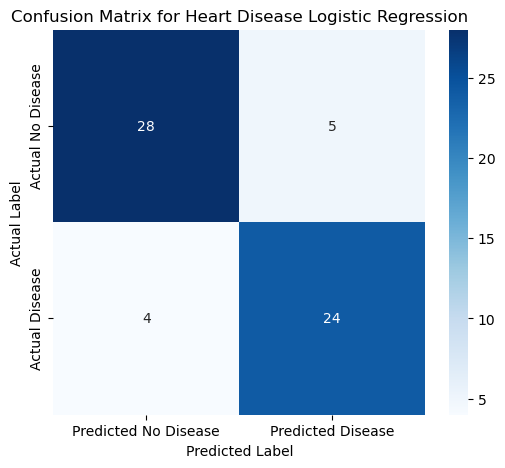

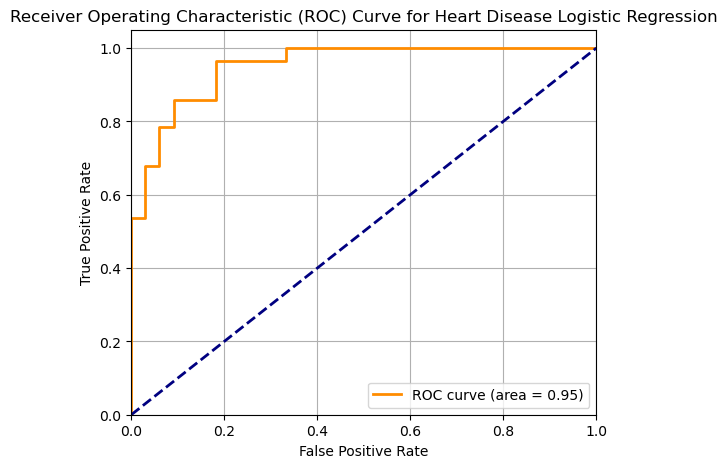


Evaluating Heart Disease Random Forest...
  Accuracy: 0.8689
  Precision: 0.8333
  Recall: 0.8929
  F1-Score: 0.8621


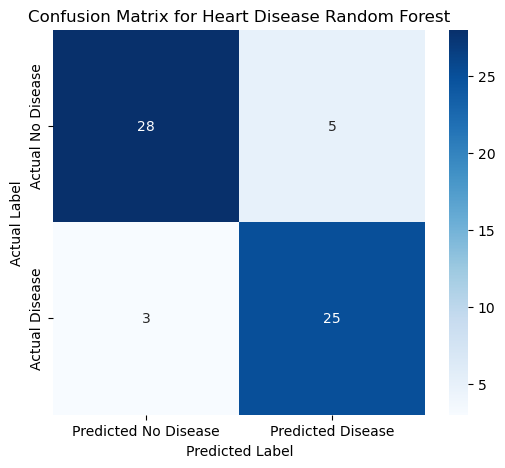

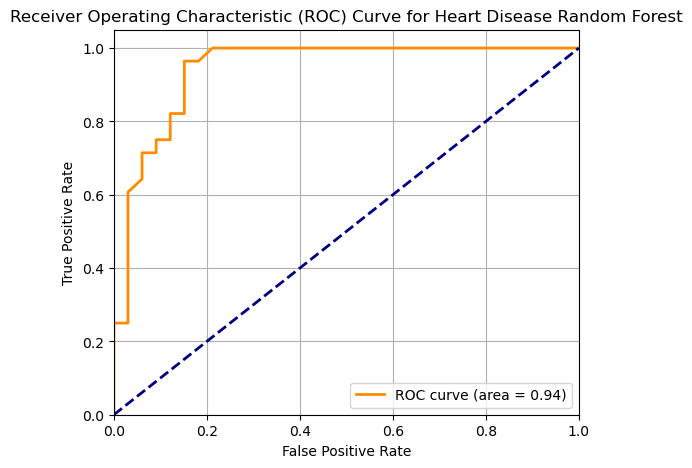


  Feature Importances for Heart Disease Random Forest:
thalach        0.125064
thal_7.0       0.114404
oldpeak        0.107586
cp_4.0         0.093219
age            0.090376
chol           0.085231
trestbps       0.080461
exang_1.0      0.057065
sex_1.0        0.045745
ca_1.0         0.038692
slope_2.0      0.037728
cp_3.0         0.024458
restecg_2.0    0.023858
ca_2.0         0.018628
cp_2.0         0.017452
ca_3.0         0.014103
fbs_1.0        0.012596
thal_6.0       0.008997
slope_3.0      0.004018
restecg_1.0    0.000319
dtype: float64


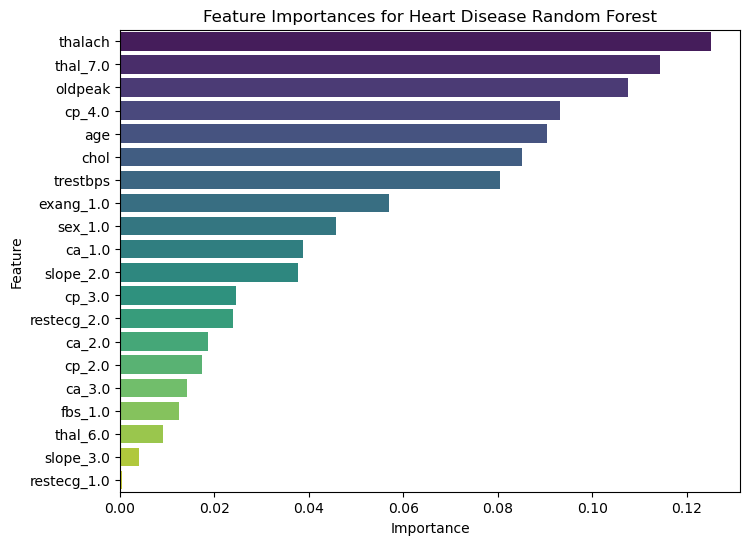


Evaluating Heart Disease Decision Tree...
  Accuracy: 0.7213
  Precision: 0.6667
  Recall: 0.7857
  F1-Score: 0.7213


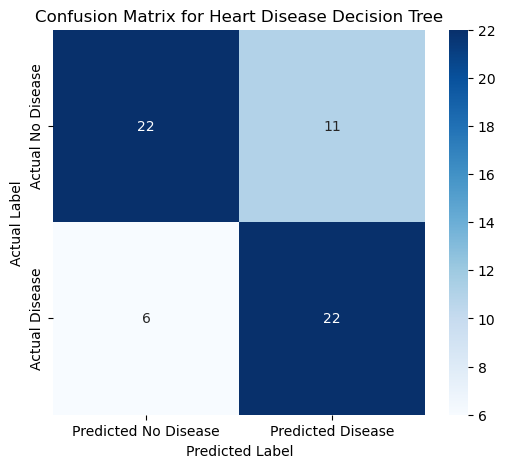

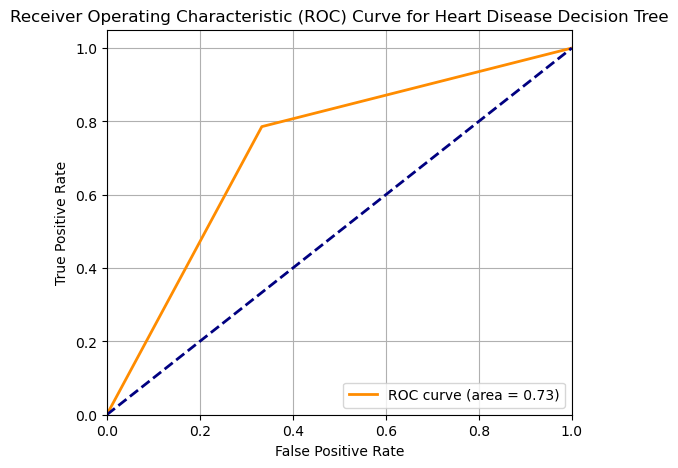


  Feature Importances for Heart Disease Decision Tree:
thal_7.0       0.266977
thalach        0.224645
chol           0.085814
cp_4.0         0.078970
oldpeak        0.072045
age            0.049522
trestbps       0.033338
ca_2.0         0.032949
sex_1.0        0.031093
restecg_2.0    0.030789
exang_1.0      0.023841
ca_1.0         0.023775
slope_2.0      0.019297
fbs_1.0        0.015533
slope_3.0      0.011412
cp_2.0         0.000000
restecg_1.0    0.000000
cp_3.0         0.000000
ca_3.0         0.000000
thal_6.0       0.000000
dtype: float64


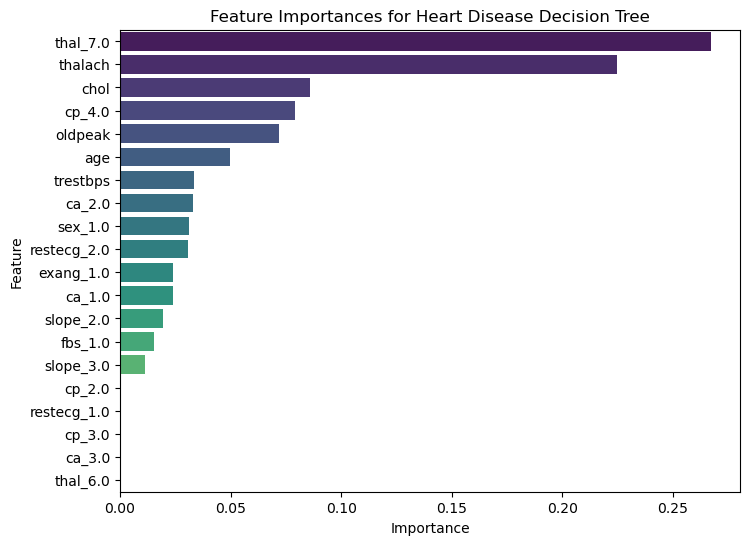


--- Heart Disease Model Evaluation Complete ---

--- Summary of Heart Disease Model Performance ---

Heart Disease Logistic Regression:
  Accuracy: 0.8525
  Precision: 0.8276
  Recall: 0.8571
  F1-Score: 0.8421

Heart Disease Random Forest:
  Accuracy: 0.8689
  Precision: 0.8333
  Recall: 0.8929
  F1-Score: 0.8621

Heart Disease Decision Tree:
  Accuracy: 0.7213
  Precision: 0.6667
  Recall: 0.7857
  F1-Score: 0.7213


In [10]:
# --- Enhancement 1: Integrating More Disease Prediction Models (Heart Disease) ---
# --- Step 1.5: Evaluate Heart Disease Models ---

print("\n--- Starting Heart Disease Model Evaluation ---")

# Import necessary metrics and plotting tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store Heart Disease models for easy iteration
heart_models = {
    "Heart Disease Logistic Regression": heart_log_reg_model,
    "Heart Disease Random Forest": heart_rf_model,
    "Heart Disease Decision Tree": heart_dt_model
}

# Loop through each Heart Disease model to make predictions and evaluate
heart_evaluation_results = {}

for name, model in heart_models.items():
    print(f"\nEvaluating {name}...")

    # Determine which test set to use (scaled for Logistic Regression, unscaled for others)
    if "Logistic Regression" in name:
        # Use scaled test data for Logistic Regression
        y_pred = model.predict(X_heart_test_scaled)
        y_prob = model.predict_proba(X_heart_test_scaled)[:, 1]
    else:
        # Use original (unscaled) test data for tree-based models
        y_pred = model.predict(X_heart_test)
        y_prob = model.predict_proba(X_heart_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_heart_test, y_pred)
    precision = precision_score(y_heart_test, y_pred)
    recall = recall_score(y_heart_test, y_pred)
    f1 = f1_score(y_heart_test, y_pred)

    heart_evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Generate and display Confusion Matrix
    cm = confusion_matrix(y_heart_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Disease', 'Predicted Disease'],
                yticklabels=['Actual No Disease', 'Actual Disease'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Generate and display ROC Curve
    fpr, tpr, thresholds = roc_curve(y_heart_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Display Feature Importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        print(f"\n  Feature Importances for {name}:")
        # Ensure X_heart is used for column names
        feature_importances = pd.Series(model.feature_importances_, index=X_heart.columns).sort_values(ascending=False)
        print(feature_importances)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

print("\n--- Heart Disease Model Evaluation Complete ---")

# Print a summary of all Heart Disease model results
print("\n--- Summary of Heart Disease Model Performance ---")
for name, metrics in heart_evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


In [11]:
# --- Enhancement 1: Integrating More Disease Prediction Models (Heart Disease) ---
# --- Step 1.6: Save the Heart Disease Models ---

print("\n--- Saving Heart Disease Models ---")

import joblib # Ensure joblib is imported

# Save each trained Heart Disease model as a .pkl file
joblib.dump(heart_log_reg_model, 'heart_log_reg_model.pkl')
joblib.dump(heart_rf_model, 'heart_rf_model.pkl')
joblib.dump(heart_dt_model, 'heart_dt_model.pkl')

print("Heart Disease Models saved successfully as .pkl files:")
print("- heart_log_reg_model.pkl")
print("- heart_rf_model.pkl")
print("- heart_dt_model.pkl")

print("\n--- Heart Disease Model Saving Complete ---")



--- Saving Heart Disease Models ---
Heart Disease Models saved successfully as .pkl files:
- heart_log_reg_model.pkl
- heart_rf_model.pkl
- heart_dt_model.pkl

--- Heart Disease Model Saving Complete ---


In [12]:
print(X_heart.columns.tolist())

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']


In [13]:
# --- Enhancement 2: Advanced Model Optimization ---
# --- Step 2.1: Advanced Optimization for Diabetes Prediction Models ---

print("\n--- Starting Advanced Model Optimization for Diabetes Models ---")

# Import necessary tools for hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler # For Logistic Regression

# IMPORTANT: Ensure X_train and y_train DataFrames are loaded from the previous data splitting step.
# If you encounter NameError: name 'X_train' is not defined, please run the data splitting cell first.

# Re-initialize models with a placeholder for optimized versions
# We will replace these with the best estimators found by GridSearchCV
optimized_log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
optimized_rf_model = RandomForestClassifier(random_state=42)
optimized_dt_model = DecisionTreeClassifier(random_state=42)


# --- Optimization for Random Forest Classifier (Diabetes) ---
print("\nOptimizing Random Forest Classifier for Diabetes...")

# Define the parameter grid to search
# n_estimators: number of trees in the forest
# max_features: number of features to consider when looking for the best split
# max_depth: maximum number of levels in tree
# min_samples_split: minimum number of samples required to split an internal node
# min_samples_leaf: minimum number of samples required to be at a leaf node
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None], # None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold for cross-validation
# StratifiedKFold ensures that each fold has the same proportion of target classes as the full dataset.
# This is crucial for our imbalanced diabetes dataset.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
# estimator: the model to tune (RandomForestClassifier)
# param_grid: the parameters to search
# cv: cross-validation strategy
# scoring: metric to optimize (e.g., 'f1' is good for imbalanced datasets)
# n_jobs: number of CPU cores to use (-1 means use all available)
# verbose: controls the verbosity of the output
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=cv_strategy,
    scoring='f1', # F1-score is a good metric for imbalanced classification
    n_jobs=-1,
    verbose=2
)

# Perform the grid search on the training data
grid_search_rf.fit(X_train, y_train)

print("\nRandom Forest Optimization Complete.")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best F1-score for Random Forest: {grid_search_rf.best_score_:.4f}")

# Update the optimized Random Forest model
optimized_rf_model = grid_search_rf.best_estimator_
print("Optimized Random Forest model updated.")


# --- Optimization for Logistic Regression (Diabetes) ---
# Logistic Regression is often tuned with different parameters, and scaling is crucial.
print("\nOptimizing Logistic Regression for Diabetes...")

# Scale the training data for Logistic Regression
scaler_log_reg = StandardScaler()
X_train_scaled_log_reg = scaler_log_reg.fit_transform(X_train)

# Define a simpler parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'], # Algorithms to use in the optimization problem
    'max_iter': [1000] # Ensure enough iterations
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Perform grid search on scaled training data
grid_search_lr.fit(X_train_scaled_log_reg, y_train)

print("\nLogistic Regression Optimization Complete.")
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best F1-score for Logistic Regression: {grid_search_lr.best_score_:.4f}")

# Update the optimized Logistic Regression model
optimized_log_reg_model = grid_search_lr.best_estimator_
print("Optimized Logistic Regression model updated.")


# --- Optimization for Decision Tree Classifier (Diabetes) ---
print("\nOptimizing Decision Tree Classifier for Diabetes...")

param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_dt.fit(X_train, y_train)

print("\nDecision Tree Optimization Complete.")
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best F1-score for Decision Tree: {grid_search_dt.best_score_:.4f}")

# Update the optimized Decision Tree model
optimized_dt_model = grid_search_dt.best_estimator_
print("Optimized Decision Tree model updated.")

print("\n--- Advanced Model Optimization for Diabetes Models Complete ---")

# You will need to save these optimized models later.



--- Starting Advanced Model Optimization for Diabetes Models ---

Optimizing Random Forest Classifier for Diabetes...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Random Forest Optimization Complete.
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best F1-score for Random Forest: 0.6661
Optimized Random Forest model updated.

Optimizing Logistic Regression for Diabetes...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Logistic Regression Optimization Complete.
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}
Best F1-score for Logistic Regression: 0.6584
Optimized Logistic Regression model updated.

Optimizing Decision Tree Classifier for Diabetes...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Decision Tree Optimization Complete.
Best parameters for Decision Tree: {'criterion': 'gini', 'max_dep

In [14]:
# --- Enhancement 2: Advanced Model Optimization ---
# --- Step 2.2: Advanced Optimization for Heart Disease Prediction Models ---

print("\n--- Starting Advanced Model Optimization for Heart Disease Models ---")

# Import necessary tools (already imported in previous cell, but good for self-containment)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler # For Logistic Regression

# IMPORTANT: Ensure X_heart_train and y_heart_train DataFrames are loaded from the previous data splitting step.
# If you encounter NameError: name 'X_heart_train' is not defined, please run the Heart Disease data pipeline cell first.

# Re-initialize models with a placeholder for optimized versions
# We will replace these with the best estimators found by GridSearchCV
optimized_heart_log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
optimized_heart_rf_model = RandomForestClassifier(random_state=42)
optimized_heart_dt_model = DecisionTreeClassifier(random_state=42)


# --- Optimization for Random Forest Classifier (Heart Disease) ---
print("\nOptimizing Random Forest Classifier for Heart Disease...")

param_grid_rf_heart = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use the same StratifiedKFold strategy
cv_strategy_heart = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf_heart = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf_heart,
    cv=cv_strategy_heart,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_rf_heart.fit(X_heart_train, y_heart_train)

print("\nRandom Forest Optimization for Heart Disease Complete.")
print(f"Best parameters for Heart Disease Random Forest: {grid_search_rf_heart.best_params_}")
print(f"Best F1-score for Heart Disease Random Forest: {grid_search_rf_heart.best_score_:.4f}")

optimized_heart_rf_model = grid_search_rf_heart.best_estimator_
print("Optimized Heart Disease Random Forest model updated.")


# --- Optimization for Logistic Regression (Heart Disease) ---
print("\nOptimizing Logistic Regression for Heart Disease...")

# Scale the training data for Logistic Regression
scaler_log_reg_heart = StandardScaler()
X_heart_train_scaled_log_reg = scaler_log_reg_heart.fit_transform(X_heart_train)

param_grid_lr_heart = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

grid_search_lr_heart = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr_heart,
    cv=cv_strategy_heart,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_lr_heart.fit(X_heart_train_scaled_log_reg, y_heart_train)

print("\nLogistic Regression Optimization for Heart Disease Complete.")
print(f"Best parameters for Heart Disease Logistic Regression: {grid_search_lr_heart.best_params_}")
print(f"Best F1-score for Heart Disease Logistic Regression: {grid_search_lr_heart.best_score_:.4f}")

optimized_heart_log_reg_model = grid_search_lr_heart.best_estimator_
print("Optimized Heart Disease Logistic Regression model updated.")


# --- Optimization for Decision Tree Classifier (Heart Disease) ---
print("\nOptimizing Decision Tree Classifier for Heart Disease...")

param_grid_dt_heart = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt_heart = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt_heart,
    cv=cv_strategy_heart,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search_dt_heart.fit(X_heart_train, y_heart_train)

print("\nDecision Tree Optimization for Heart Disease Complete.")
print(f"Best parameters for Heart Disease Decision Tree: {grid_search_dt_heart.best_params_}")
print(f"Best F1-score for Heart Disease Decision Tree: {grid_search_dt_heart.best_score_:.4f}")

optimized_heart_dt_model = grid_search_dt_heart.best_estimator_
print("Optimized Heart Disease Decision Tree model updated.")

print("\n--- Advanced Model Optimization for Heart Disease Models Complete ---")

# You will need to save these optimized models later.



--- Starting Advanced Model Optimization for Heart Disease Models ---

Optimizing Random Forest Classifier for Heart Disease...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Random Forest Optimization for Heart Disease Complete.
Best parameters for Heart Disease Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-score for Heart Disease Random Forest: 0.7877
Optimized Heart Disease Random Forest model updated.

Optimizing Logistic Regression for Heart Disease...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Logistic Regression Optimization for Heart Disease Complete.
Best parameters for Heart Disease Logistic Regression: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}
Best F1-score for Heart Disease Logistic Regression: 0.8363
Optimized Heart Disease Logistic Regression model updated.

Optimizing Decision Tree Classifier for Heart Disease...
Fitting 5 folds for each o

In [15]:
# --- Saving Optimized Models (Diabetes & Heart Disease) ---

print("\n--- Saving Optimized Diabetes and Heart Disease Models ---")

import joblib # Ensure joblib is imported

# --- Save Optimized Diabetes Models ---
print("\nSaving Optimized Diabetes Models...")
joblib.dump(optimized_log_reg_model, 'log_reg_model_optimized.pkl')
joblib.dump(optimized_rf_model, 'rf_model_optimized.pkl')
joblib.dump(optimized_dt_model, 'dt_model_optimized.pkl')
print("Optimized Diabetes Models saved successfully as .pkl files.")

# --- Save Optimized Heart Disease Models ---
print("\nSaving Optimized Heart Disease Models...")
joblib.dump(optimized_heart_log_reg_model, 'heart_log_reg_model_optimized.pkl')
joblib.dump(optimized_heart_rf_model, 'heart_rf_model_optimized.pkl')
joblib.dump(optimized_heart_dt_model, 'heart_dt_model_optimized.pkl')
print("Optimized Heart Disease Models saved successfully as .pkl files.")

print("\n--- All Optimized Models Saved Complete ---")



--- Saving Optimized Diabetes and Heart Disease Models ---

Saving Optimized Diabetes Models...
Optimized Diabetes Models saved successfully as .pkl files.

Saving Optimized Heart Disease Models...
Optimized Heart Disease Models saved successfully as .pkl files.

--- All Optimized Models Saved Complete ---
